In [1]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras.callbacks import TensorBoard
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

In [2]:
input_img = Input(shape=(28,28,1))

In [3]:
x = Conv2D(32,(3,3), activation='relu',padding='same')(input_img)
x = MaxPooling2D((2,2), padding='same')(x)
x = Conv2D(32,(3,3), activation='relu',padding='same')(x)
encoded = MaxPooling2D((2,2),padding='same')(x)

In [4]:
x = Conv2D(32,(3,3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2,2))(x)
x = Conv2D(32,(3,3), activation='relu', padding='same')(x)
x = UpSampling2D((2,2))(x)
decoded = Conv2D(1,(3,3), activation='sigmoid', padding='same')(x)

In [5]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [6]:
(x_train, _), (x_test, _) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [7]:
x_train = x_train / 255.
x_test = x_test / 255.

In [8]:
x_train.shape

(60000, 28, 28)

In [9]:
x_train = np.reshape(x_train,(len(x_train),28,28,1))
x_test = np.reshape(x_test,(len(x_test),28,28,1))

In [10]:
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(size=x_test.shape)

In [11]:
x_train_noisy = np.clip(x_train_noisy,0.,1.)
x_test_noisy = np.clip(x_test_noisy,0.,1.)

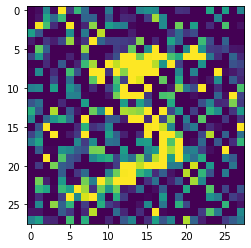

In [12]:
plt.imshow(x_train_noisy[0].reshape(28,28))
plt.show()

In [21]:
autoencoder.fit(x_train_noisy,x_train,
               epochs = 75, batch_size=128,
               shuffle=True,
               validation_data=(x_test_noisy,x_test))

Epoch 1/75
469/469 [==============================] - 3s 7ms/step - loss: 0.1603 - val_loss: 0.1589
Epoch 2/75
469/469 [==============================] - 3s 7ms/step - loss: 0.1598 - val_loss: 0.1584
Epoch 3/75
469/469 [==============================] - 3s 7ms/step - loss: 0.1593 - val_loss: 0.1579
Epoch 4/75
469/469 [==============================] - 3s 7ms/step - loss: 0.1589 - val_loss: 0.1574
Epoch 5/75
469/469 [==============================] - 3s 7ms/step - loss: 0.1584 - val_loss: 0.1570
Epoch 6/75
469/469 [==============================] - 3s 7ms/step - loss: 0.1580 - val_loss: 0.1566
Epoch 7/75
469/469 [==============================] - 3s 7ms/step - loss: 0.1575 - val_loss: 0.1561
Epoch 8/75
469/469 [==============================] - 3s 7ms/step - loss: 0.1571 - val_loss: 0.1557
Epoch 9/75
469/469 [==============================] - 3s 7ms/step - loss: 0.1567 - val_loss: 0.1553
Epoch 10/75
469/469 [==============================] - 3s 7ms/step - loss: 0.1563 - val_loss: 0.1548

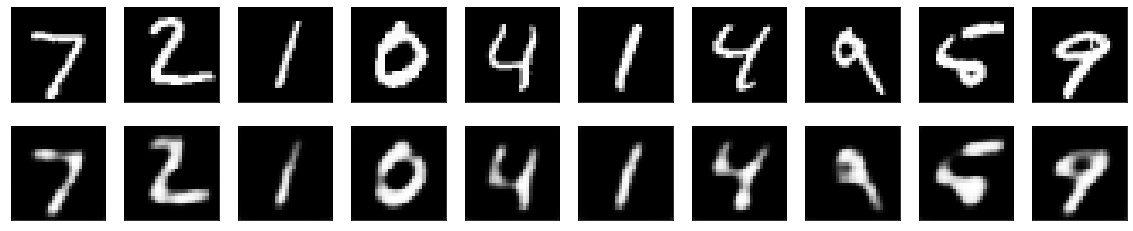

In [22]:
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20,4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display reconstruction
    ax = plt.subplot(2, n, i + n +1)
    plt.imshow(decoded_imgs[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()